

# **NLP Task 2**

## **DJS Synapse Learning Period**
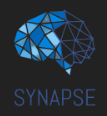

#**Word Embedding**
2 types:


1.   Count or Frequency based (BoW, TF-IDF, One Hot encoding)
2.   Deep Learning Trained models (Word2Vec, Average Word2Vec)

Word2Vec: CBOW, SkipGrams
Resources: https://youtu.be/Z1VsHYcNXDI

In [1]:
!pip install gensim==4.2.0
import gensim
print(gensim.__version__)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
4.2.0


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Dataset link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [3]:
# Load the dataset and delete the latter 2 columns while preprocessing
df = pd.read_csv('/content/gdrive/MyDrive/spam.csv', encoding = "ISO-8859-1")
df.drop(df.columns[2:],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
# Create a function to pre-process your data. Using stemming or lemmatization is upto your own choice


In [6]:
#Add your code here
corpus=[]
l=[]
for i in df['v2']:
  rev=re.sub('[^a-zA-Z]',' ',i)
  rev=rev.lower()
  rev=nltk.word_tokenize(rev)
  rev=[lemmatizer.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
  rev=' '.join(rev)
  corpus.append(rev)
corpus
df['corpus']=corpus

##Word2Vec


###CBOW or SkipGram (sg = 0/1) default is CBOW

Word2Vec resources: https://builtin.com/machine-learning/nlp-word2vec-python

In [7]:
import gensim
x=df['v1'].values.tolist()
y=df['v2'].values.tolist()
corp=x+y
word=[nltk.word_tokenize(sent) for sent in corp]
word[-1]

['Rofl', '.', 'Its', 'true', 'to', 'its', 'name']

In [8]:
model1=gensim.models.Word2Vec(word,window=5,min_count=2)#window, min_count, max_count, size are important hyperparameters

In [9]:
model1.wv.most_similar('I')
model1.wv.most_similar('man',topn=6)
#model.wv.most_similar('man')
#model.most_similar('lunch')
model1.wv.similarity('man','woman')
#model.wv.similarity('man','man')


0.9324477

##Average Word2Vec
In average Word2Vec, the model is fed with an average of all the vectors obtained from the vectorization techniques. For eg. in this task, our model will be fed a single array of size Nx1 which is an average vector of all the vectors in the sentence.

In [10]:
import numpy as np
from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim.models import word2vec

def avg_word2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)



In [11]:
# Train a suitable model using Word2Vec and avg_word2vec and find out it's classification report and accuracy on the given dataset
# Add your code in the following cells
par1=pd.read_csv('/content/gdrive/MyDrive/IMDB Dataset.csv.zip')
par1


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [12]:
# Add your code for the Word2Vec model in the following cells

In [13]:
docs=par1['review']
corpus=[]
for i in docs:
  i=i.lower()
  rev=nltk.word_tokenize(i)
  corpus.append(rev)
#corpus[0]

In [14]:
par1['tokens']=corpus
par1.head()
a=par1['tokens'].values.tolist()

In [15]:
model=gensim.models.Word2Vec(a,window=5,min_count=2)


In [16]:
model.wv.most_similar('man')

[('woman', 0.752000093460083),
 ('boy', 0.7294476628303528),
 ('guy', 0.7074007987976074),
 ('lady', 0.6731996536254883),
 ('doctor', 0.6576531529426575),
 ('soldier', 0.6378920674324036),
 ('murderer', 0.6346753239631653),
 ('person', 0.6320061087608337),
 ('priest', 0.630521833896637),
 ('widow', 0.6067876815795898)]

In [17]:
# Add your code for the Average Word2Vec model in the following cells

In [18]:
par1.head()

,review,sentiment,tokens
0,One of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,"[a, wonderful, little, production, ., <, br, /..."
2,I thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,"[basically, there, 's, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, 's, ``, love, in, the, time, ..."


In [19]:
vec=[]
for i in par1['tokens']:
  v=avg_word2vec(i)
  vec.append(v)



In [20]:
par1['vec']=vec
par1.head()

,review,sentiment,tokens,vec
0,One of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...","[0.07427952, -0.1252641, -0.014206735, 0.43060..."
1,A wonderful little production. <br /><br />The...,positive,"[a, wonderful, little, production, ., <, br, /...","[0.016740594, -0.106198, 0.20940821, 0.5568499..."
2,I thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[0.13410705, 0.21682532, 0.10920198, 0.2520147..."
3,Basically there's a family where a little boy ...,negative,"[basically, there, 's, a, family, where, a, li...","[0.10872525, 0.18471529, 0.21337727, 0.3863809..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, 's, ``, love, in, the, time, ...","[0.024214283, 0.017826522, 0.16875395, 0.64467..."


In [21]:
'''X=par1.iloc[:,3:4]
print(X.shape)
y1=pd.get_dummies(par1['sentiment'])
y=y1.iloc[:,1]
print(y.shape)'''
X=par1.iloc[:,3:4].values.tolist()
y1=pd.get_dummies(par1['sentiment'])
y=y1.iloc[:,1].values.tolist()

'''np.array(X,dtype=object)
np.array(y,dtype=object)
type(X)
type(y)'''


'np.array(X,dtype=object)\nnp.array(y,dtype=object)\ntype(X)\ntype(y)'

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)



from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()


classifier.fit(X_train,y_train)

ValueError: ignored

In [25]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

NameError: ignored

#Create your own embedding layer using Keras

Advised to use colab for GPU purposes.

You can use jupyter nb if your PC has a dedicated graphics card.

If using colab, got to the "Runtime" tab and change "Runtime type" to GPU

In [26]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [27]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence

##One-Hot representation

The one-hot library on the input vocabulary size returns an array of integers ranging from 1 to vocabulary size. It indicates the index of the '1' in the one hot representation for the word.

Build sequential models using keras: https://www.youtube.com/watch?v=8uC-WT1LYnU, https://www.youtube.com/watch?v=VGCHcgmZu24

In [30]:
# OH_rep = [one_hot('''sentences''', '''vocabulary size''')] choose a good vocabulary size to avoid out of vocabulary error
# Add your code here
sentences=["hey ,I am Sam.","testing sequential model","really tough!","lets figure it out!"]
print(sentences)
label=[1,1,0,0]


['hey ,I am Sam.', 'testing sequential model', 'really tough!', 'lets figure it out!']


In [31]:
vocab_size=50
OH_rep=[one_hot(x,vocab_size) for x in sentences]
print(OH_rep)

[[24, 48, 18, 37], [25, 12, 38], [30, 32], [43, 38, 29, 38]]


In [32]:
# Padding: 2 types: pre padding, post padding try both
# Wisely select the sentence length to accomodate all sentences with a couple of extra bits to avoid errors.
# Add your code here
max_len=4
padpost=pad_sequences(OH_rep,maxlen=max_len,padding='post')
print(padpost)
padpre=pad_sequences(OH_rep,maxlen=max_len,padding='pre')
print(padpre)
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

[[24 48 18 37]
 [25 12 38  0]
 [30 32  0  0]
 [43 38 29 38]]
[[24 48 18 37]
 [ 0 25 12 38]
 [ 0  0 30 32]
 [43 38 29 38]]


In [33]:
# select your feature dimensions: 5 for very small datasets, 10 is generally a good choice
input_dim=5

In [34]:
# Create a sequential model with an embedding layer with the appropriate vocabulary size and the decided sentence length
# Use an appropriate optimizer 'adam' and loss function 'mse' to compile your model
# Add your code here
model_keras=Sequential()
model_keras.add(Embedding(vocab_size,12,input_length=max_len ))
model_keras.compile(optimizer='adam',loss='mse')
print(model_keras.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 12)             600       
                                                                 
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
tokenizer=Tokenizer(num_words=100,lower=1,oov_token=True)#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index
print(word_index)

sequences=tokenizer.texts_to_sequences(sentences)
print(sequences)

{True: 1, 'hey': 2, 'i': 3, 'am': 4, 'sam': 5, 'testing': 6, 'sequential': 7, 'model': 8, 'really': 9, 'tough': 10, 'lets': 11, 'figure': 12, 'it': 13, 'out': 14}
[[2, 3, 4, 5], [6, 7, 8], [9, 10], [11, 12, 13, 14]]


# **Plotting Embeddings**
T-distributed Stochastic Neighbor Embedding



Let's now visualize some of our embeddings. To plot embeddings with a dimensionality of 100 or more, we first need to map them to a dimensionality of 2. We do this with the popular [t-SNE](https://lvdmaaten.github.io/tsne/) method. T-SNE, short for t-distributed Stochastic Neighbor Embedding, helps us visualize high-dimensional data by mapping similar data to nearby points and dissimilar data to distance points in the low-dimensional space.

T-SNE is present in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). To run it, we just have to specify the number of dimensions we'd like to map the data to ('n_components'), and the similarity metric that t-SNE should use to compute the similarity between two data points ('metric'). We're going to map to 2 dimensions and use the cosine as our similarity metric. Additionally, we use PCA as an initialization method to remove some noise and speed up computation. The [Scikit-learn user guide](https://scikit-learn.org/stable/modules/manifold.html#t-sne) contains some additional tips for optimizing performance. 

Plotting all the embeddings in our vector space would result in a very crowded figure where the labels are hardly legible. Therefore we'll focus on a subset of embeddings by selecting the 200 most similar words to a target word.

Intuition to how TSNE works: https://youtu.be/NEaUSP4YerM

In [36]:
# will take some time to run
docs=par1['review']
words=[]
for i in docs:
  i=i.lower()
  rev=nltk.word_tokenize(i)
  words.append(rev)


In [37]:
model = gensim.models.Word2Vec(words, min_count=100, window=5)

In [38]:
words[0]

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'they',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 '.',
 'trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'it',
 'is',
 'called',
 'oz',
 'as',


In [49]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
target_word= 'hey'
# Selecting the top 200 similar words for plotting
selected_words = [w[0] for w in model.wv.most_similar(positive=[target_word], topn=200)] + [target_word]
embeddings = [model.wv[w] for w in selected_words] + model.wv['good']

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


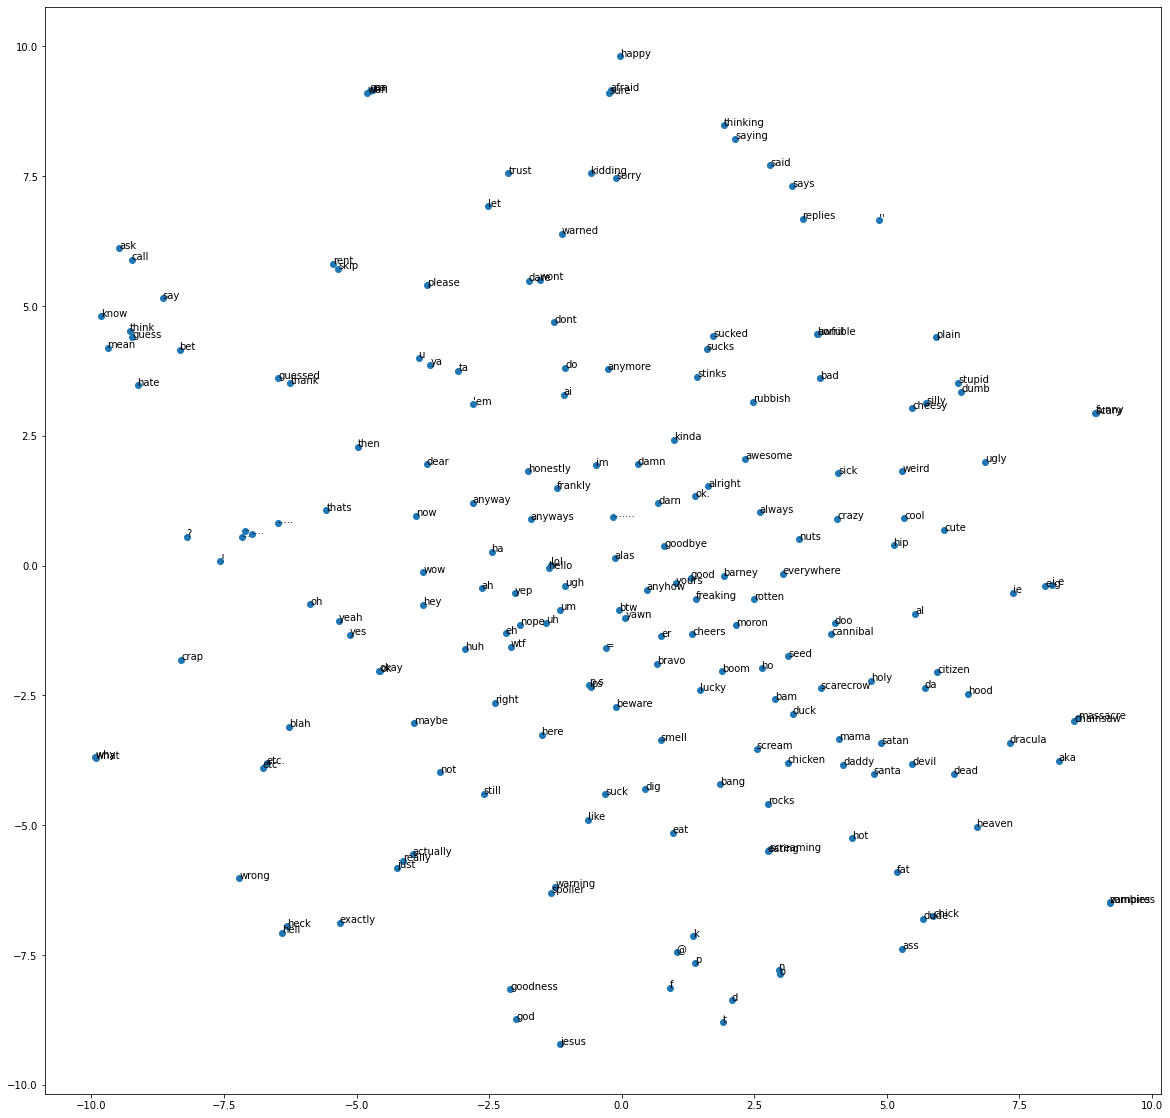

In [50]:
plt.figure(figsize=(20,20))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))